In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import charset_normalizer as chz
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monthly-food-price-estimates/WLD_RTP_details_2023-10-02.csv
/kaggle/input/monthly-food-price-estimates/ddi-documentation-english_microdata-4483 (1).pdf
/kaggle/input/monthly-food-price-estimates/ddi-documentation-english_microdata-4509.pdf
/kaggle/input/monthly-food-price-estimates/WLD_RTFP_country_2023-10-02.csv


Learning what i can about the dataset -- 

In [3]:
country_2023 = pd.read_csv('/kaggle/input/monthly-food-price-estimates/WLD_RTFP_country_2023-10-02.csv')

In [4]:
country_2023.head()

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01


open,high and close columns refer to monthly food price estimates.

In [6]:
country_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4734 non-null   float64
 1   High       4734 non-null   float64
 2   Low        4734 non-null   float64
 3   Close      4734 non-null   float64
 4   Inflation  4434 non-null   float64
 5   country    4798 non-null   object 
 6   ISO3       4798 non-null   object 
 7   date       4798 non-null   object 
dtypes: float64(5), object(3)
memory usage: 300.0+ KB


In [8]:
country_2023['date'] = pd.to_datetime(country_2023['date'])

In [13]:
country_2023['Year'].value_counts()

Year
2015    300
2021    300
2012    300
2013    300
2014    300
2022    300
2016    300
2017    300
2018    300
2019    300
2020    300
2011    276
2009    252
2010    252
2023    250
2008    240
2007    228
Name: count, dtype: int64

<Axes: ylabel='country'>

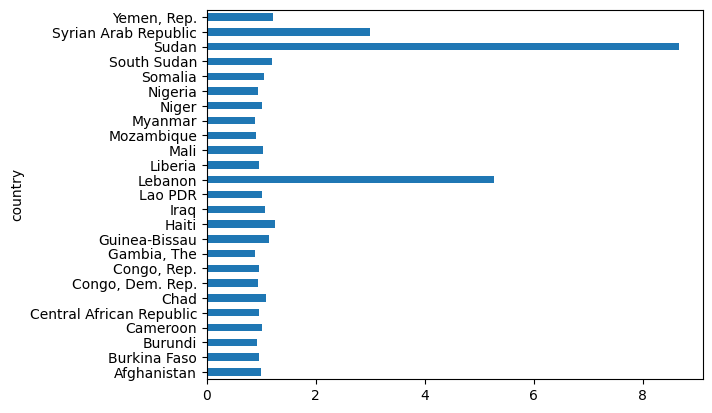

In [16]:
country_2023.groupby('country')['High'].agg('mean').plot.barh()
plt.xlabel('')

Text(0.5, 1.0, 'Max highs of each Country')

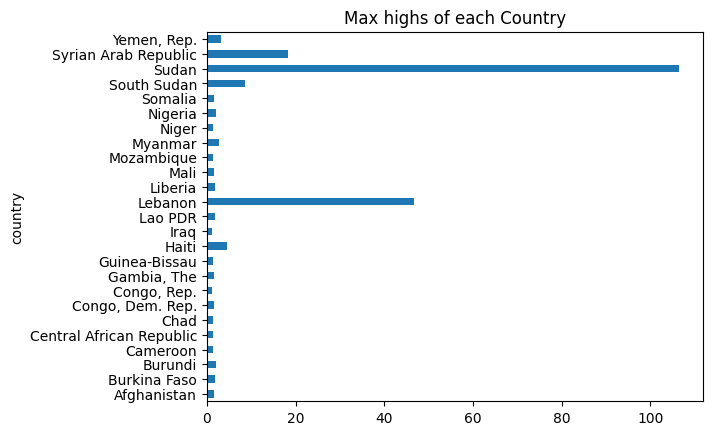

In [36]:
country_2023.groupby('country')['High'].agg('max').plot.barh()
plt.title('Max highs of each Country')


Grouping data with record of inflation.

In [45]:
inflation = np.where(country_2023['Inflation'].notnull())
inflation_data = country_2023.iloc[inflation]

Checking the highest rate of inflation for each country.

Text(0.5, 0, 'Inflation')

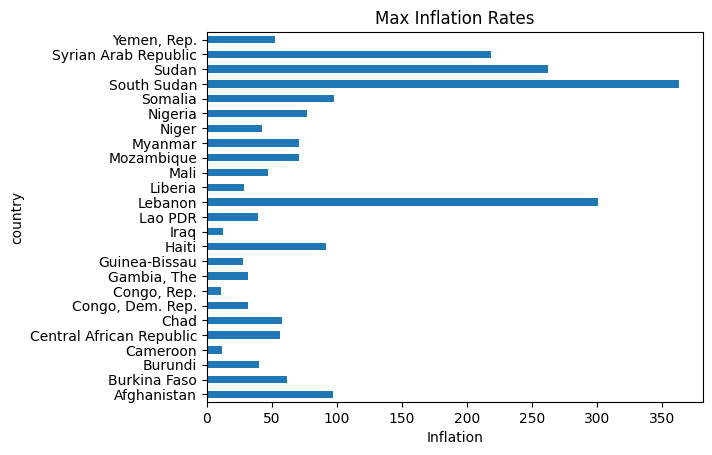

In [50]:
inflation_data.groupby('country')['Inflation'].agg('max').plot.barh()
plt.title('Max Inflation Rates')
plt.xlabel('Inflation')

In [53]:
inflation_data.groupby('country')[['Inflation','Year']].agg('max').reset_index()

,country,Inflation,Year
0,Afghanistan,96.79,2023
1,Burkina Faso,61.76,2023
2,Burundi,39.84,2023
3,Cameroon,12.00,2023
4,Central African Republic,56.33,2023
5,Chad,57.75,2023
6,"Congo, Dem. Rep.",31.43,2023
7,"Congo, Rep.",11.04,2023
8,"Gambia, The",31.40,2023
9,Guinea-Bissau,27.58,2023


2023 has the highest rate of inflation for each Country.

Grouping numerical columns to check correlations

In [54]:
numerical = country_2023.select_dtypes(exclude='object')

In [57]:
numerical.corr()

,Open,High,Low,Close,Inflation,date,Year
Open,1.000000,0.998958,0.999731,0.997202,0.362280,0.226595,0.225936
High,0.998958,1.000000,0.998734,0.998961,0.362110,0.224284,0.223652
Low,0.999731,0.998734,1.000000,0.997874,0.363067,0.229070,0.228425
Close,0.997202,0.998961,0.997874,1.000000,0.364800,0.227450,0.226860
Inflation,0.362280,0.362110,0.363067,0.364800,1.000000,0.172590,0.172298
date,0.226595,0.224284,0.229070,0.227450,0.172590,1.000000,0.998185
Year,0.225936,0.223652,0.228425,0.226860,0.172298,0.998185,1.000000


No relevant correlations.

In [61]:
country_2023.groupby('country')[['Close','Year']].agg('max')

,Close,Year
country,,
Afghanistan,1.55,2023
Burkina Faso,1.78,2023
Burundi,1.97,2023
Cameroon,1.29,2023
Central African Republic,1.45,2023
Chad,1.40,2023
"Congo, Dem. Rep.",1.54,2023
"Congo, Rep.",1.06,2023
"Gambia, The",1.73,2023


2023 has the highest close prices

In [64]:
country_2023.groupby('country')[['Close','Year']].agg('min')['Year'].value_counts()

Year
2007    19
2011     2
2012     2
2008     1
2009     1
Name: count, dtype: int64

2007 is the most common year after grouping by lowest close prices per country.